In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# ---------------------------
# Phase 1: Load & Inspect
# ---------------------------
df = pd.read_csv('ecommerce_orders_61000.csv')

print("Shape:", df.shape)
display(df.head())
print("\nInfo:")
display(df.info())
print("\nNumeric summary:")
display(df.describe(include='all'))
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

display(df['Status'].value_counts())

Shape: (61000, 12)


,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,PaymentMethod,City,State,Country,Status
0,b976d425-e942-43fb-8373-017da6768c78,98c85a58-6f8e-46d4-b357-02639c684b6d,2025-05-03,Keyboard,Accessories,4,22362.47,Cash on Delivery,Staceyberg,Missouri,India,Cancelled
1,9835245a-fe5f-47d3-a6d8-179a59a7a4d2,f8e2290c-d074-408f-a056-42d1304f2fbc,2024-07-27,Tablet,Accessories,4,8369.45,Credit Card,Anitafurt,Maryland,India,Returned
2,2542cff6-0710-41c5-802e-3a7aa1515f1e,2050b1f1-521f-4c6e-bcf9-cf61371b6cce,2025-02-16,Headphones,Electronics,4,39330.68,Cash on Delivery,South Timothyport,Tennessee,India,Cancelled
3,56a734ad-41d3-4cec-adbf-2cb8e6066e9e,0748e0d6-424c-4429-9482-289d626840df,2024-08-22,Laptop,Electronics,4,34274.60,Credit Card,Lake Robin,Indiana,India,Returned
4,80e51d91-eafe-4d43-9fb6-d5ac95db51df,5c516fcc-fc55-4186-a163-3628cba4719d,2023-11-16,Tablet,Mobile,2,45461.00,Debit Card,North Joannamouth,Nevada,India,Cancelled



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61000 entries, 0 to 60999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        61000 non-null  object 
 1   CustomerID     61000 non-null  object 
 2   OrderDate      61000 non-null  object 
 3   Product        61000 non-null  object 
 4   Category       61000 non-null  object 
 5   Quantity       61000 non-null  int64  
 6   Price          61000 non-null  float64
 7   PaymentMethod  61000 non-null  object 
 8   City           61000 non-null  object 
 9   State          61000 non-null  object 
 10  Country        61000 non-null  object 
 11  Status         61000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.6+ MB


None


Numeric summary:


,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,PaymentMethod,City,State,Country,Status
count,61000,61000,61000,61000,61000,61000.000000,61000.000000,61000,61000,61000,61000,61000
unique,60000,60000,731,7,4,NaN,NaN,5,28285,50,1,4
top,330ea369-6ac0-4376-8906-7609c5f71d74,0ab89918-ee4e-4108-8719-710402125c9d,2025-09-02,Monitor,Accessories,NaN,NaN,Credit Card,South Michael,Pennsylvania,India,Delivered
freq,2,2,108,8824,15443,NaN,NaN,12298,56,1331,61000,15351
mean,NaN,NaN,NaN,NaN,NaN,2.495262,25503.110156,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.116463,14141.705618,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1000.160000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,13181.520000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.000000,25475.460000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.000000,37733.975000,NaN,NaN,NaN,NaN,NaN



Missing values per column:
 OrderID          0
CustomerID       0
OrderDate        0
Product          0
Category         0
Quantity         0
Price            0
PaymentMethod    0
City             0
State            0
Country          0
Status           0
dtype: int64

Duplicate rows: 1000


,count
Status,
Delivered,15351
Cancelled,15296
Returned,15218
Shipped,15135


In [20]:
# ---------------------------
# Phase 2: Cleaning & Features
# ---------------------------
# Convert dates, create Revenue, basic type fixes
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')   # coerce bad values
df['Revenue'] = df['Price'] * df['Quantity']

# Optional: drop rows where OrderDate failed to parse
bad_dates = df['OrderDate'].isna().sum()
if bad_dates:
    print(f"Warning: {bad_dates} rows have bad OrderDate and will be dropped.")
    df = df.dropna(subset=['OrderDate'])

# Quick check
display(df[['OrderDate','Price','Quantity','Revenue']].head())
display(df.head())


,OrderDate,Price,Quantity,Revenue
0,2025-05-03,22362.47,4,89449.88
1,2024-07-27,8369.45,4,33477.80
2,2025-02-16,39330.68,4,157322.72
3,2024-08-22,34274.60,4,137098.40
4,2023-11-16,45461.00,2,90922.00


,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,PaymentMethod,City,State,Country,Status,Revenue
0,b976d425-e942-43fb-8373-017da6768c78,98c85a58-6f8e-46d4-b357-02639c684b6d,2025-05-03,Keyboard,Accessories,4,22362.47,Cash on Delivery,Staceyberg,Missouri,India,Cancelled,89449.88
1,9835245a-fe5f-47d3-a6d8-179a59a7a4d2,f8e2290c-d074-408f-a056-42d1304f2fbc,2024-07-27,Tablet,Accessories,4,8369.45,Credit Card,Anitafurt,Maryland,India,Returned,33477.80
2,2542cff6-0710-41c5-802e-3a7aa1515f1e,2050b1f1-521f-4c6e-bcf9-cf61371b6cce,2025-02-16,Headphones,Electronics,4,39330.68,Cash on Delivery,South Timothyport,Tennessee,India,Cancelled,157322.72
3,56a734ad-41d3-4cec-adbf-2cb8e6066e9e,0748e0d6-424c-4429-9482-289d626840df,2024-08-22,Laptop,Electronics,4,34274.60,Credit Card,Lake Robin,Indiana,India,Returned,137098.40
4,80e51d91-eafe-4d43-9fb6-d5ac95db51df,5c516fcc-fc55-4186-a163-3628cba4719d,2023-11-16,Tablet,Mobile,2,45461.00,Debit Card,North Joannamouth,Nevada,India,Cancelled,90922.00


Status
Delivered    15351
Cancelled    15296
Returned     15218
Shipped      15135
Name: count, dtype: int64


/tmp/ipython-input-337250126.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set1')


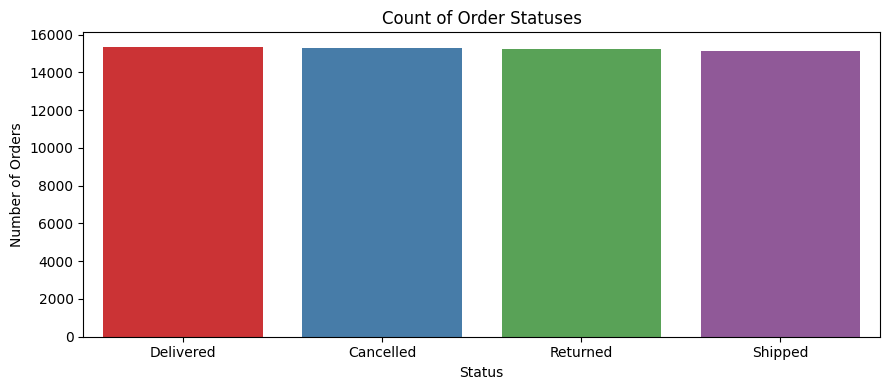

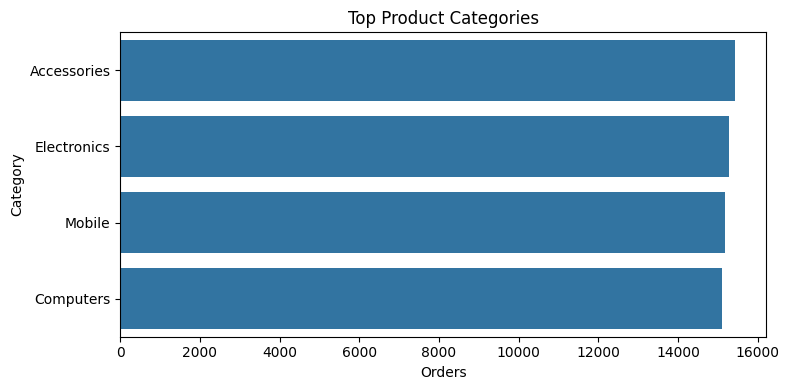

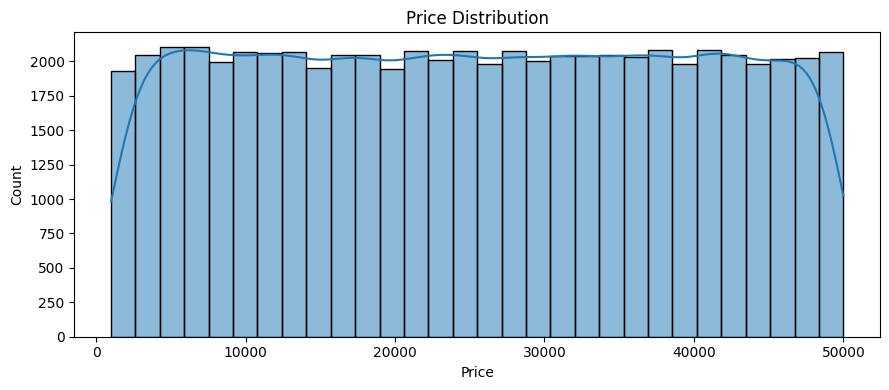

In [21]:
# ---------------------------
# Phase 3: Univariate Analysis
# ---------------------------

# Status counts (categorical)
status_counts = df['Status'].value_counts()
print(status_counts)

plt.figure(figsize=(9,4))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set1')
plt.title('Count of Order Statuses')
plt.ylabel('Number of Orders')
plt.xlabel('Status')
plt.tight_layout()
plt.show()

# Top categories
plt.figure(figsize=(8,4))
top_cats = df['Category'].value_counts().nlargest(8)
sns.barplot(y=top_cats.index, x=top_cats.values)
plt.title('Top Product Categories')
plt.xlabel('Orders')
plt.tight_layout()
plt.show()

# Price distribution
plt.figure(figsize=(9,4))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

Delivered orders: 15351


,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,PaymentMethod,City,State,Country,Status,Revenue
5,142ea869-cfd9-4339-b4f0-bdee5dcd25b7,7f2c69eb-5437-4394-8fb5-c6d898d42d6e,2024-07-03,Tablet,Mobile,2,48387.77,Net Banking,New Susan,New Mexico,India,Delivered,96775.54
7,305f2d54-112c-4ed5-81f2-8189bdbf5fd6,75e8a106-c661-4932-964c-1a6ca747f2ca,2025-03-23,Laptop,Electronics,3,5601.10,Credit Card,East Biancaland,Pennsylvania,India,Delivered,16803.30
11,6ab34790-43d0-4151-bed2-dc21054c37a5,bca39b09-1e22-42d8-8df7-7d80ac978fb1,2025-09-19,Phone,Computers,3,17310.86,Cash on Delivery,East Tammyshire,Iowa,India,Delivered,51932.58
13,c36090dd-1bf8-4a37-8aef-d72bbfc30bb0,60f778a1-60bd-4d2d-95d4-1dfb46d9b00c,2024-10-03,Keyboard,Electronics,4,48257.92,Cash on Delivery,North Jose,Illinois,India,Delivered,193031.68
14,73cb1eb8-5def-4f0a-97f6-2d1d9372a6c7,a9a2c87f-0aae-4852-8fca-be49b6f9fba8,2024-06-28,Mouse,Accessories,4,17080.13,Debit Card,Vazquezland,Arkansas,India,Delivered,68320.52


/tmp/ipython-input-2379232025.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Revenue', y='Product', palette='Greens_r')


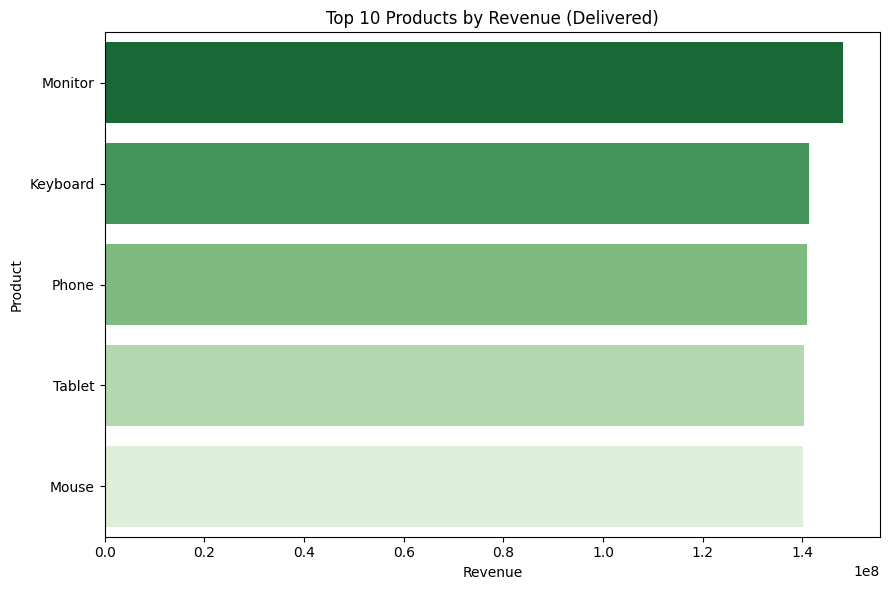

/tmp/ipython-input-2379232025.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='Revenue', y='State', palette='Oranges_r')


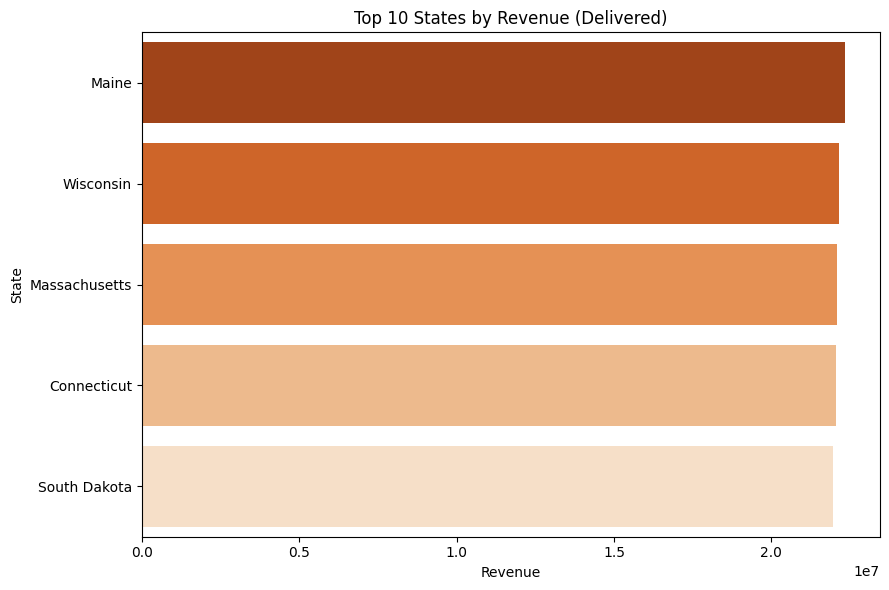

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,PaymentMethod,City,State,Country,Status,Revenue
105,31856809-57b3-4f12-b40c-e72059024b55,95f6d954-39b3-42a9-875b-47e8406a573a,2025-06-23,Laptop,Computers,4,5776.29,Cash on Delivery,Griffinchester,New Jersey,India,Shipped,23105.16
132,6e39700d-b193-4195-97c0-0835d74bc287,2355e31e-9309-4590-8ad6-ee18a8026420,2025-08-27,Monitor,Accessories,2,16646.42,Net Banking,South Faithview,New Jersey,India,Cancelled,33292.84
133,4889adec-c196-4a2d-a3ff-34bdafddaf1e,28103481-32ef-441b-adce-b1c02e7566d3,2023-11-03,Headphones,Accessories,4,13566.00,Cash on Delivery,East Jonathanborough,New Jersey,India,Returned,54264.00
194,8974021b-353d-4269-9380-aebd6ee4fa35,c4e918c4-2211-42e7-84d6-d8522a7067c5,2024-09-16,Tablet,Computers,4,48912.78,Net Banking,South Susanshire,New Jersey,India,Cancelled,195651.12
203,ba385149-03e2-487b-876f-9902fac8143f,f8e39aaf-435c-4cea-a64b-1be532abaabb,2023-10-25,Phone,Electronics,2,36018.31,Cash on Delivery,Johnsonborough,New Jersey,India,Returned,72036.62


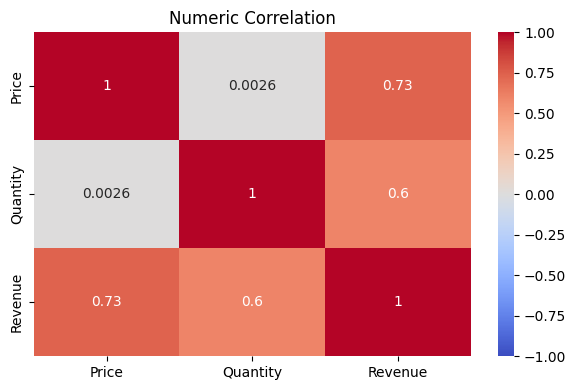

             Price  Quantity   Revenue
Price     1.000000  0.002638  0.734843
Quantity  0.002638  1.000000  0.595345
Revenue   0.734843  0.595345  1.000000


In [34]:
# ---------------------------
# Phase 4: Bivariate (focus on Delivered)
# ---------------------------


delivered_df = df[df['Status'] == 'Delivered'].copy()
print("Delivered orders:", delivered_df.shape[0])
display(delivered_df.head())


# Top products by revenue (Delivered)
top_products = delivered_df.groupby('Product')['Revenue'].sum().nlargest(5).reset_index()
plt.figure(figsize=(9,6))
sns.barplot(data=top_products, x='Revenue', y='Product', palette='Greens_r')
plt.title('Top 10 Products by Revenue (Delivered)')
plt.tight_layout()
plt.show()

# Top states by revenue (Delivered)
top_states = delivered_df.groupby('State')['Revenue'].sum().nlargest(5).reset_index()
plt.figure(figsize=(9,6))
sns.barplot(data=top_states, x='Revenue', y='State', palette='Oranges_r')
plt.title('Top 10 States by Revenue (Delivered)')
plt.tight_layout()
plt.show()


TN_sales = df[df['State'] == 'New Jersey'].copy()
display(TN_sales.head())
# ---------------------------
# Phase 4 (cont): Correlation numeric
# ---------------------------
numeric_cols = ['Price', 'Quantity', 'Revenue']
corr = df[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Numeric Correlation')
plt.tight_layout()
plt.show()
print(corr)

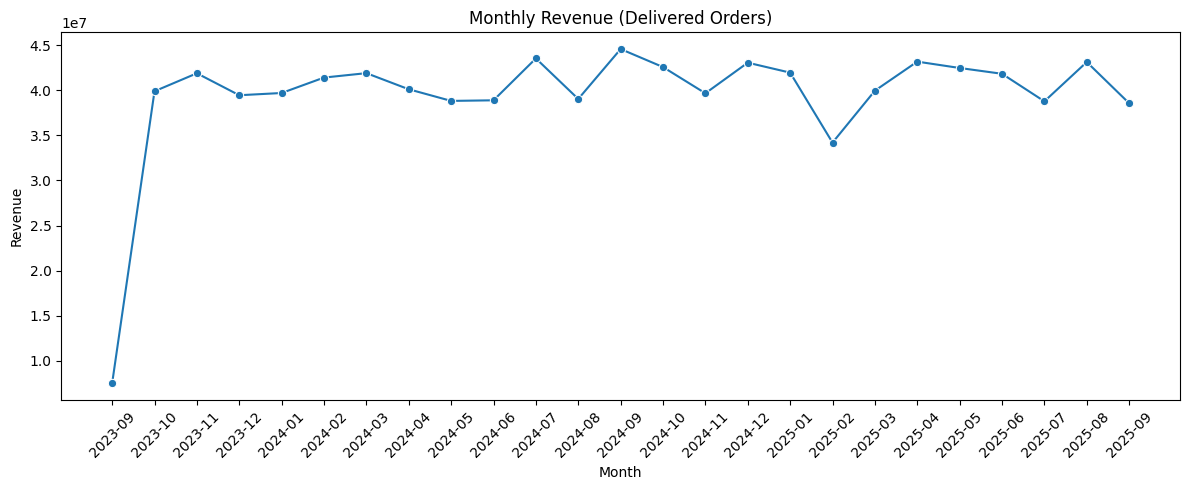

/tmp/ipython-input-3498242309.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_by_month.index, y=monthly_by_month.values, palette='Blues_r')


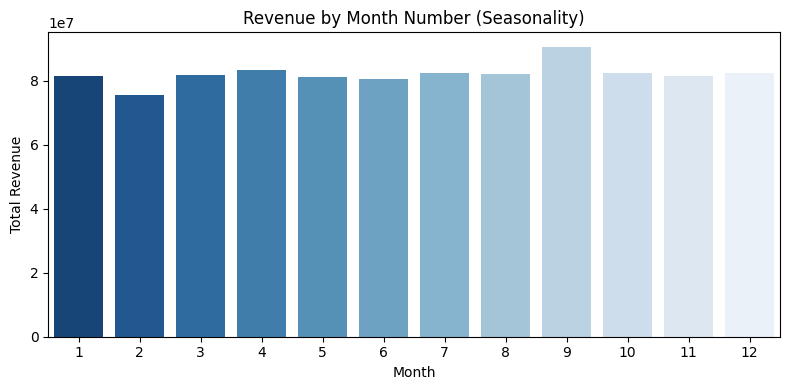

In [35]:
# ---------------------------
# Phase 5: Time Series & Trend
# ---------------------------
# Create month period and aggregate (Delivered)
delivered_df['OrderMonth'] = delivered_df['OrderDate'].dt.to_period('M')
monthly_sales = delivered_df.groupby('OrderMonth')['Revenue'].sum().reset_index()
monthly_sales['OrderMonth_str'] = monthly_sales['OrderMonth'].astype(str)

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales, x='OrderMonth_str', y='Revenue', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue (Delivered Orders)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# Quick seasonal check: group by month number
delivered_df['month_num'] = delivered_df['OrderDate'].dt.month
monthly_by_month = delivered_df.groupby('month_num')['Revenue'].sum()
plt.figure(figsize=(8,4))
sns.barplot(x=monthly_by_month.index, y=monthly_by_month.values, palette='Blues_r')
plt.title('Revenue by Month Number (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()



Failed orders count: 30514


/tmp/ipython-input-1887189198.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_failed, x='failed_count', y='Product', palette='Reds_r')


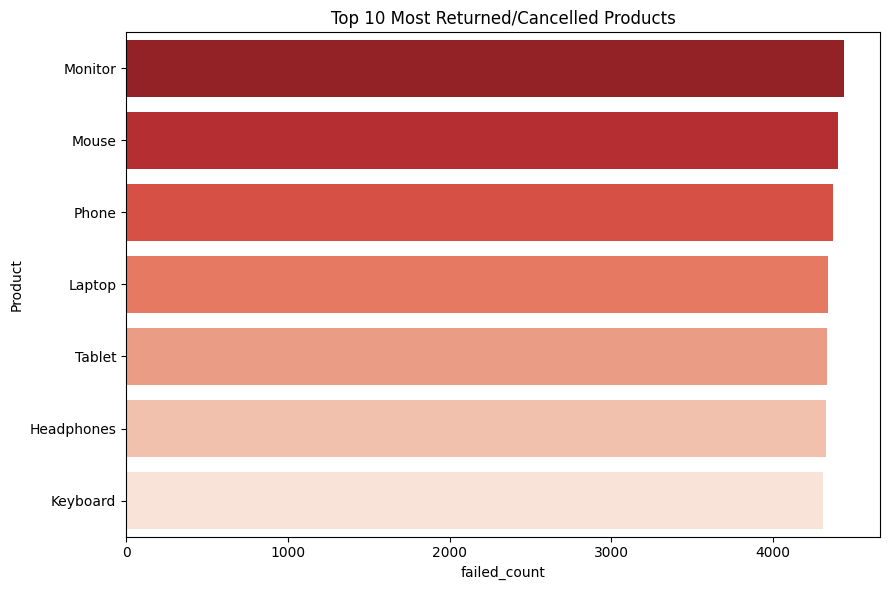

      Product  delivered_count  failed_count
3     Monitor             2251          4438
6      Tablet             2223          4331
5       Phone             2217          4370
1    Keyboard             2201          4307
4       Mouse             2175          4402
2      Laptop             2165          4337
0  Headphones             2119          4329


In [36]:
# ---------------------------
# Phase 6: Multivariate - The Problem (failed orders)
# ---------------------------
failed_df = df[df['Status'].isin(['Cancelled','Returned'])].copy()
print("Failed orders count:", failed_df.shape[0])

# Top failed products
top_failed = failed_df['Product'].value_counts().nlargest(10).reset_index()
top_failed.columns = ['Product','failed_count']

plt.figure(figsize=(9,6))
sns.barplot(data=top_failed, x='failed_count', y='Product', palette='Reds_r')
plt.title('Top 10 Most Returned/Cancelled Products')
plt.tight_layout()
plt.show()

# Compare top delivered products vs top failed products (quick view)
top_delivered_products = delivered_df['Product'].value_counts().nlargest(10).reset_index()
top_delivered_products.columns = ['Product','delivered_count']

compare = top_delivered_products.merge(top_failed, on='Product', how='outer').fillna(0)
print(compare.sort_values('delivered_count', ascending=False))



In [9]:
# ---------------------------
# Phase 7: Business Insights (printable summary)
# ---------------------------
total_orders = df.shape[0]
failed_pct = failed_df.shape[0] / total_orders * 100
print(f"Total orders: {total_orders:,}")
print(f"Failed orders (Cancelled+Returned): {failed_df.shape[0]:,} ({failed_pct:.1f}%)")

print("\nTop delivered products (by revenue):")
display(top_products)

print("\nTop failed products (by count):")
display(top_failed)

print("\nMonthly peaks/troughs (check plot above).")
print("\nRECOMMENDATION (immediate): Investigate why top-sellers (e.g., Laptops, Smartphones) have high return/cancel rates. Check product pages, shipping/packaging, and return reasons.")



Total orders: 12,895
Failed orders (Cancelled+Returned): 6,490 (50.3%)

Top delivered products (by revenue):


,Product,Revenue
0,Mouse,30418083.12
1,Monitor,30090357.01
2,Keyboard,29837375.47
3,Headphones,29449743.48
4,Phone,28547985.68
5,Tablet,27891545.40
6,Laptop,27594225.74



Top failed products (by count):


,Product,failed_count
0,Keyboard,949
1,Mouse,941
2,Monitor,941
3,Tablet,937
4,Headphones,915
5,Laptop,908
6,Phone,899



Monthly peaks/troughs (check plot above).

RECOMMENDATION (immediate): Investigate why top-sellers (e.g., Laptops, Smartphones) have high return/cancel rates. Check product pages, shipping/packaging, and return reasons.


In [10]:
# ---------------------------
# Phase 8: Visualization summary (suggestions)
# ---------------------------
# --- Suggestions to export results ---
# 1) Save cleaned CSV for dashboards
df.to_csv('ecommerce_orders_61000_cleaned.csv', index=False)

# 2) Save summary tables
monthly_sales.to_csv('monthly_sales_delivered.csv', index=False)
top_products.to_csv('top_products_by_revenue.csv', index=False)
top_failed.to_csv('top_failed_products.csv', index=False)

print("Saved cleaned data and summary CSVs. Next step: build dashboard in Tableau/PowerBI or create interactive plots.")



Saved cleaned data and summary CSVs. Next step: build dashboard in Tableau/PowerBI or create interactive plots.
